This file is the post-processing script for GPT-4o generated content.

In [1]:
import json
import os
import pprint 
import re
pp = pprint.PrettyPrinter(indent=4)

img_prompt_respond_file = '../data/meme_retrieval_data/img_prompt_respond_1-33283.json' # img_prompt_respond_1-33283.json
meme_configs = []
with open(img_prompt_respond_file, 'r', encoding='utf-8') as json_file:
        meme_configs = json.load(json_file)


In [2]:


# attributes = ['visual elaboration', 'detected text', 
#               'meaning of the meme', 'literary device', 'emotion word']

'''
Invalid response cases for 'visual elaboration':
1. No such information;
2. Empty response;

Invalid response cases for 'detected text':
1. No such information;
2. Missing keywords;

Invalid response cases for 'literary device':
1. Missing keywords;
2. Replied with "Category word";
3. Replied with "Chosen word";


Invalid response cases for 'emotion word':
1. Missing keywords;
2. Replied with "Category word";
3. Replied with "Chosen word";


Invalid response cases for 'meaning of the meme':
1. GPT-4o refuses to provide information: "I'm sorry, but I can't assist with that.";
2. Incomplete response, but only restricted to one repeated meme: zzwah.jpg

'''

'\nInvalid response cases for \'visual elaboration\':\n1. No such information;\n2. Empty response;\n\nInvalid response cases for \'detected text\':\n1. No such information;\n2. Missing keywords;\n\nInvalid response cases for \'literary device\':\n1. Missing keywords;\n2. Replied with "Category word";\n3. Replied with "Chosen word";\n\n\nInvalid response cases for \'emotion word\':\n1. Missing keywords;\n2. Replied with "Category word";\n3. Replied with "Chosen word";\n\n\nInvalid response cases for \'meaning of the meme\':\n1. GPT-4o refuses to provide information: "I\'m sorry, but I can\'t assist with that.";\n2. Incomplete response, but only restricted to one repeated meme: zzwah.jpg\n\n'

In [3]:
literary_device = set("sarcasm, allegory, alliteration, allusion, amplification, anagram, analogy, anthropomorphism, antithesis, chiasmus, circumlocution, euphemism, hyperbole, imagery, metaphor, onomatopoeia, oxymoron, paradox, personification, portmanteau, pun, satire, simile, symbolism, none".split(', '))
emotion_word = set("fear, anger, joy, sadness, surprise, disgust, guilt, contempt, shame, embarrassment, envy, jealousy, love, hate, interest, none".split(', '))
# literary_device, emotion_word, len(literary_device), len(emotion_word)

In [4]:
# Counting the number of samples that have 'visual elaboration', 'detected text' and 'meaning of the meme' at the same time.
# If the majority samples satisfy this constriction, then discard the rest.
counter = 0
temp_meme_configs = []
for meme_id, meme_conf in enumerate(meme_configs):
    if ('visual elaboration' in meme_conf['respond'].lower() and
        'detected text' in meme_conf['respond'].lower() and
        'meaning of the meme' in meme_conf['respond'].lower()):
        temp_meme_configs.append(dict(meme_conf))
        counter += 1 

counter

33189

In [5]:
# First, handle "\n\n"s in the detected text content
show_example = True
new_meme_configs = [dict(ite) for ite in temp_meme_configs] # Deep copy
for meme_id, meme_conf in enumerate(new_meme_configs):
    # Insert <s> as a delimiter to seperate the first 3 attributes (e.g., visual elaboration, detected text, etc.)
    lines = meme_conf['respond'].split('\n')
    # if "2a4mj4" in meme_conf["image_dir"]:
    #     print(meme_conf["image_dir"], meme_conf['respond'])
    for idx in range(len(lines)):
        if len(lines[idx].strip()) > 0:
            if 'visual elaboration' in lines[idx].lower():
                lines[idx] = '<s>\n' + lines[idx]
            elif 'detected text' in lines[idx].lower():
                lines[idx] = '<s>\n' + lines[idx]
            elif 'meaning of the meme' in lines[idx].lower():
                lines[idx] = '<s>\n' + lines[idx]
            else:
                # print('Outlier: meme_id ', meme_id)
                pass
    meme_conf['respond'] = '\n'.join(lines)
    # if "2a4mj4" in meme_conf["image_dir"]:
    #     print(meme_conf["image_dir"], meme_conf['respond'])

    # Change "\n\n"s in the detected text content into '\n'
    lines = meme_conf['respond'].split('<s>')
    for idx in range(len(lines)):
        if len(lines[idx].strip()) > 0:
            if 'detected text' in lines[idx].lower() and "\n\n" in lines[idx].strip():
                if show_example:
                    print('Befoew:', lines[idx])
                    lines[idx] = re.sub(r'\n\n', '\n', lines[idx])
                    print('After:', lines[idx])
                    show_example = False
                else:
                    lines[idx] = re.sub(r'\n\n', '\n', lines[idx])
    meme_conf['respond'] = '<s>'.join(lines)  
    # print(meme_conf['respond'])  

Befoew: 
**Detected Text**: 
"I THINK MY COMPUTER NEEDS MORE MEMORY

IT ALWAYS ASKS ME WHAT MY PASSWORD IS"


After: 
**Detected Text**: 
"I THINK MY COMPUTER NEEDS MORE MEMORY
IT ALWAYS ASKS ME WHAT MY PASSWORD IS"



In [6]:
# Second, add <s> before literary device and emotion label
show_example = True
for meme_id, meme_conf in enumerate(new_meme_configs):
    # Insert <s> as a delimiter to seperate the first 3 attributes (e.g., visual elaboration, detected text, etc.)
    lines = meme_conf['respond'].split('\n')
    for idx in range(len(lines)):
        if len(lines[idx].strip()) > 0:
            if ('literary device' in lines[idx].lower() or 
                'word:' in lines[idx].lower() or 
                'category word' in lines[idx].lower() or 
                'chosen word' in lines[idx].lower()):
                lines[idx] = '<s>\n' + lines[idx]
            elif ('emotion word' in lines[idx].lower() or 
                'word:' in lines[idx].lower() or 
                'category word' in lines[idx].lower() or 
                'chosen word' in lines[idx].lower()):
                lines[idx] = '<s>\n' + lines[idx]
    meme_conf['respond'] = '\n'.join(lines)

    # utilizing "\n\n" as a separater to handle cases without attribute keywords.
    meme_conf['respond'] = re.sub(r'\n\n', '\n<s>\n', meme_conf['respond'])
    if show_example:
        pp.pprint(meme_conf['respond'])
        show_example = False


('<s>\n'
 'Visual Elaboration (focus on the main content): The image is a close-up of a '
 'young man with a dazed, slightly confused expression, appearing to be under '
 'the influence of marijuana. The background is simple, perhaps taken in an '
 'indoor setting.\n'
 '<s>\n'
 '<s>\n'
 'Detected Text: "I TRIED TO BRAINSTORM ONCE / BUT I GOT LOST IN THE FOG"\n'
 '<s>\n'
 '<s>\n'
 'Meaning of the Meme (briefly): The meme humorously suggests that when the '
 'person attempted to think deeply or come up with ideas ("brainstorm"), they '
 'ended up getting confused or distracted ("lost in the fog") due to their '
 'apparent state of being high.\n'
 '<s>\n'
 '<s>\n'
 'Literary Device: Hyperbole\n'
 '<s>\n'
 '<s>\n'
 'Emotion Word: None')


In [7]:
# Third, fix mis-seperated labels and remove empty lines
from collections import defaultdict

length_set = defaultdict(lambda: 0)
temp_new_meme_configs = [dict(ite) for ite in new_meme_configs] # Deep copy
for idx, meme_conf in enumerate(temp_new_meme_configs):
    # remove empty lines and possible extra <s>s
    lines = meme_conf['respond'].split('<s>')
    non_empty_lines = [line for line in lines if (len(line.strip()) > 0)]
    if idx < 1:
        print("Before:", meme_conf['respond'])
        print("After:", '<s>'.join(non_empty_lines))
    if len(non_empty_lines) < 5:
        '''
        After: 
        Visual Elaboration (focus on the main content): An image of the "Y U NO" Guy, a character with an exaggerated facial expression and gesturing hands, is presented with text in a blocky, capitalized font.
        <s>
        Detected Text: 
        BRAIN
        WHY U NO WORK DURING TEST
        <s>
        Meaning of the Meme (briefly): The meme humorously expresses frustration with one's brain for not functioning properly or recalling information during an important test, highlighting a common experience of forgetfulness under pressure.
        Sarcasm
        Anger
        '''
        modified_flag = False
        for idx, line in enumerate(non_empty_lines):
            if 'meaning of the meme' in line.lower():
                # Extract words
                words = re.findall(r'\b[A-Za-z]+\b', line)
                if len(words) >=3 :
                    words = words[-3:]
                    for word in words:
                        if word.lower() in literary_device and word.lower() != 'none':
                            print('Before:', non_empty_lines)
                            non_empty_lines.insert(idx+1, "<s>\nliterary device: " + word)
                            non_empty_lines[idx] = re.sub(word, '', line)
                            modified_flag = True
                        if word.lower() in emotion_word and word.lower() != 'none':
                            print('Before:', non_empty_lines)
                            non_empty_lines.append("<s>\nemotion word: " + word)
                            non_empty_lines[idx] = re.sub(word, '', line)
                            modified_flag = True
                    if modified_flag:
                        break
        if modified_flag:
            print("After:", non_empty_lines)
            meme_conf['respond'] = '<s>'.join(non_empty_lines)
    length_set[len(non_empty_lines)] += 1
length_set
 

Before: <s>
Visual Elaboration (focus on the main content): The image is a close-up of a young man with a dazed, slightly confused expression, appearing to be under the influence of marijuana. The background is simple, perhaps taken in an indoor setting.
<s>
<s>
Detected Text: "I TRIED TO BRAINSTORM ONCE / BUT I GOT LOST IN THE FOG"
<s>
<s>
Meaning of the Meme (briefly): The meme humorously suggests that when the person attempted to think deeply or come up with ideas ("brainstorm"), they ended up getting confused or distracted ("lost in the fog") due to their apparent state of being high.
<s>
<s>
Literary Device: Hyperbole
<s>
<s>
Emotion Word: None
After: 
Visual Elaboration (focus on the main content): The image is a close-up of a young man with a dazed, slightly confused expression, appearing to be under the influence of marijuana. The background is simple, perhaps taken in an indoor setting.
<s>
Detected Text: "I TRIED TO BRAINSTORM ONCE / BUT I GOT LOST IN THE FOG"
<s>
Meaning of 

defaultdict(<function __main__.<lambda>()>,
            {5: 31355, 4: 705, 6: 954, 7: 96, 9: 40, 8: 29, 3: 8, 2: 1, 10: 1})

In [8]:
# Verification
length_set = defaultdict(lambda: 0)
for idx, meme_conf in enumerate(temp_new_meme_configs):
    lines = meme_conf['respond'].split('<s>')
    non_empty_lines = [line for line in lines if (len(line.strip()) > 0)]
    length_set[len(non_empty_lines)] += 1
length_set

defaultdict(<function __main__.<lambda>()>,
            {5: 31355, 4: 705, 6: 954, 7: 96, 9: 40, 8: 29, 3: 8, 2: 1, 10: 1})

## Extract the first three attributes 

In [9]:
meme_configs_with_s = [dict(ite) for ite in temp_new_meme_configs] # Deep copy
for idx, meme_conf in enumerate(meme_configs_with_s):
    lines = meme_conf['respond'].split('<s>')
    non_empty_lines = [line for line in lines if (len(line.strip()) > 0)]

    # Extract "visual elaboration", "detected text" and "meaning of the meme"
    for i in range(len(non_empty_lines)):
        if 'visual elaboration' in non_empty_lines[i].lower():
            temp = non_empty_lines[i].split(':')
            if (len(temp) > 1) and (not ('visual elaboration' in meme_conf.keys())):
                meme_conf['visual elaboration'] = ''.join(temp[1:]).strip()
            else:
                # print(f"XXXXXXXX: visual elaboration: {non_empty_lines[i]}")
                pass

        elif 'detected text' in non_empty_lines[i].lower():
            temp = non_empty_lines[i].split(':')
            if (len(temp) > 1) and (not ('detected text' in meme_conf.keys())):
                meme_conf['detected text'] = ''.join(temp[1:]).strip()
            else:
                # print(f"XXXXXXXX: detected text: {non_empty_lines[i]}")
                pass

        elif 'meaning of the meme' in non_empty_lines[i].lower():
            temp = non_empty_lines[i].split(':')
            if (len(temp) > 1) and (not ('meaning of the meme' in meme_conf.keys())):
                meme_conf['meaning of the meme'] = ''.join(temp[1:]).strip()
            else:
                # print(f"XXXXXXXX: meaning of the meme: {non_empty_lines[i]}")
                pass
        else:
            pass
    
    try:
        # seperate the first three atributes and the last two labels
        meme_conf['respond'] = meme_conf['respond'].split(meme_conf['meaning of the meme'])[-1]
    except:
        pass
    if idx < 3:
        pp.pprint(meme_conf)
        print('\n===========\n')



{   'detected text': '"I TRIED TO BRAINSTORM ONCE / BUT I GOT LOST IN THE FOG"',
    'image_dir': './data/meme_retrieval_data/dataset/data_unique_title_engaging/3g89a4.jpg',
    'meaning of the meme': 'The meme humorously suggests that when the person '
                           'attempted to think deeply or come up with ideas '
                           '("brainstorm"), they ended up getting confused or '
                           'distracted ("lost in the fog") due to their '
                           'apparent state of being high.',
    'prompt': 'Here is the context of the meme: "[10] Guy (also known as '
              '"Really High Guy" and "Stoner Stanley") is an advice animal '
              'image macro series featuring a photo of a young man who appears '
              'to be under the influence of marijuana. The captions typically '
              'portray stereotypical stoner behavior, similar to Stoner Dog, '
              'such as giving invalid answers to misunderstood

# Extract literary device and emotion labels

In [10]:
for idx, meme_conf in enumerate(meme_configs_with_s):
    splited_respond = meme_conf['respond'].split('<s>')
    splited_respond = [line for line in splited_respond if (len(line.strip()) > 0)]
    if idx < 100:
        print(len(splited_respond), splited_respond)

2 ['\nLiterary Device: Hyperbole\n', '\nEmotion Word: None']
2 ['\nChosen literary device word: Hyperbole\n', '\nChosen emotion word: Disgust']
2 ['\nLiterary Device: Pun\n', '\nEmotion: Amusement']
2 ['\nMetaphor\n', '\nNone']
2 ['\nChosen literary device: Hyperbole\n', '\nChosen emotion word: Joy']
2 ['\nCategory word: Pun\n', '\nEmotion word: Interest']
2 ['\nChosen literary device:\nPun\n', '\nChosen emotion word:\nHumor']
2 ['\n Literary Device: Analogy\n', '\n Emotion Word: Interest']
1 ['\n Literary Device: Pun\n \n Emotion: Joy']
2 ['\nChosen literary device: Pun\n', '\nChosen emotion word: Surprise']
2 ['\nLiterary Device: Pun\n', '\nEmotion: Surprise']
2 ['\nChosen literary device: Hyperbole\n', '\nChosen emotion word: None']
2 ['\nChosen Literary Device: Hyperbole\n', '\nChosen Emotion Word: None']
2 ['\nChosen Literary Device: Pun\n', '\nChosen Emotion: Surprise']
2 ['\nChosen Literary Device: Paradox\n', '\nChosen Emotion Word: Interest']
2 ['\nHyperbole\n', '\nSurprise']


In [11]:
number_of_unhandled_cases = 0
meme_configs_5_attributes = []
for idx, meme_conf in enumerate(meme_configs_with_s):
    splited_respond = meme_conf['respond'].split('<s>')
    splited_respond = [line for line in splited_respond if (len(line.strip()) > 0)]

    if len(splited_respond) == 2:
        # ld_ew_counter += 1
        temp = splited_respond[0].split(':') # (with ":")
        if (len(temp) > 1):
            # Define the regular expression pattern for an English word
            # Find all occurrences that match the pattern
            # Strip special tokens
            matches = re.findall(r'\b[A-Za-z]+\b', temp[1].strip())
            if len(matches) > 0:
                meme_conf['literary device'] = matches[0].lower()
        else: # Handle pattern: '<s> Hyperbole <s> Anger' (without ":")
            extracted_word = re.findall(r'\b[A-Za-z]+\b', splited_respond[0].strip())
            for ld_word in extracted_word:
                if ld_word.lower() in literary_device:
                    meme_conf['literary device'] = ld_word.lower()
                    break    

        temp = splited_respond[1].split(':')
        if (len(temp) > 1):
            matches = re.findall(r'\b[A-Za-z]+\b', temp[1].strip())
            if len(matches) > 0:
                meme_conf['emotion word'] = matches[0].lower()
        else: # Handle pattern: '<s> Hyperbole <s> Anger' (without ":")
            extracted_word = re.findall(r'\b[A-Za-z]+\b', splited_respond[1].strip())
            for ew_word in extracted_word:
                if ew_word.lower() in emotion_word:
                    meme_conf['emotion word'] = ew_word.lower()
                    break  

    else: # Handle cases without two <s>s
        words = re.findall(r'\b[A-Za-z]+\b', meme_conf['respond'])
        # "None" and labels outside the candidate set are discarded for simplify the process. 
        for word in words:
            if word.lower() != 'none' and word.lower() in literary_device:
                meme_conf['literary device'] = word.lower()
            if word.lower() != 'none' and word.lower() in emotion_word:
                meme_conf['emotion word'] = word.lower()
    
# attributes = ['visual elaboration', 'detected text', 
#               'meaning of the meme', 'literary device', 'emotion word']
    if not ('visual elaboration' in meme_conf.keys() and
            'detected text' in meme_conf.keys() and
            'meaning of the meme'in meme_conf.keys() and
            'literary device' in meme_conf.keys() and
            'emotion word' in meme_conf.keys()):
        number_of_unhandled_cases += 1
    else:
        meme_conf.pop("respond")
        meme_conf.pop("prompt")
        meme_configs_5_attributes.append(dict(meme_conf))
number_of_unhandled_cases

556

In [12]:
print(len(meme_configs_5_attributes))
with open(f"meme_configs_5_attributes.json", "w") as outfile: 
      json.dump(meme_configs_5_attributes, outfile, indent=4)

32633


# Statistics and post-check

In [13]:

img_prompt_respond_file = 'meme_configs_5_attributes.json'
p_IC_DT_MC_LD_EW_img_prompt_respond = []
with open(img_prompt_respond_file, 'r', encoding='utf-8') as json_file:
        p_IC_DT_MC_LD_EW_img_prompt_respond = json.load(json_file)


In [14]:
def str_length_statistics(dataset):
    ic_label_length = []
    dt_label_length = []
    mc_label_length = []
    ld_label_length = []
    ew_label_length = []

    for ite in dataset:
        ic_label_length.append(len(ite['visual elaboration'].split()))
        dt_label_length.append(len(ite['detected text'].split()))
        mc_label_length.append(len(ite['meaning of the meme'].split()))
        ld_label_length.append(len(ite['literary device'].split()))
        ew_label_length.append(len(ite['emotion word'].split()))

    print(set(ic_label_length))
    print(set(dt_label_length))
    print(set(mc_label_length))
    print(set(ld_label_length)) # Good, only 1
    print(set(ew_label_length)) # Good, only 1

    import pandas as pd
    import matplotlib.pyplot as plt
    # Create a DataFrame from the lists
    data = {
        'visual elaboration': ic_label_length,
        'detected text': dt_label_length,
        'meaning of the meme': mc_label_length,
        'literary device': ld_label_length,
        'emotion word': ew_label_length
    }
    df = pd.DataFrame(data)

    # Display the DataFrame
    print(df)

    # Plot a boxplot
    plt.figure(figsize=(10, 6))
    df.boxplot()
    plt.title('The distribution of the lengths of responses')
    plt.ylabel('No. of words')
    plt.show()


32633
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 93, 94, 95, 96, 97, 98, 102, 105, 113}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 91, 92, 95, 99, 106, 112, 117, 119, 128, 129, 138, 167}
{0, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,

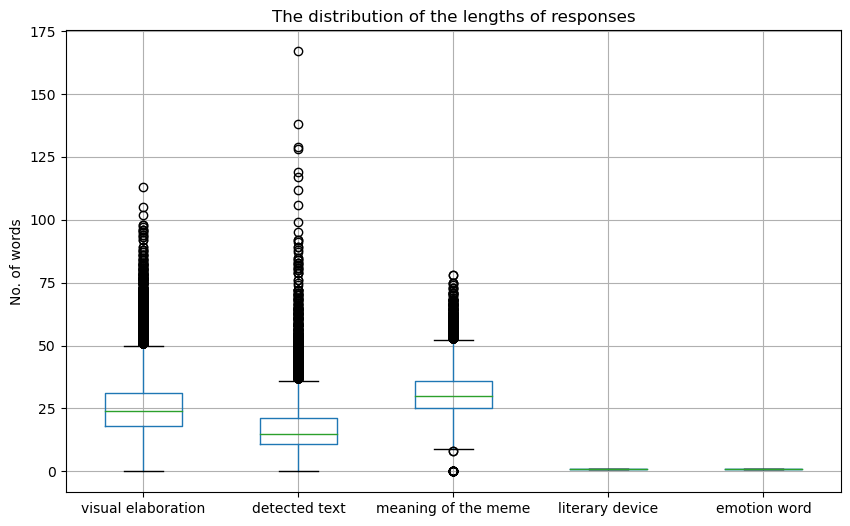

In [15]:
print(len(p_IC_DT_MC_LD_EW_img_prompt_respond))
str_length_statistics(p_IC_DT_MC_LD_EW_img_prompt_respond)

In [16]:
filtered_meme_configs_5_attributes = []
invalid_ld_labels = set()
invalid_ew_labels = set()
number_of_mislabeled_samples = 0

for idx in range(len(p_IC_DT_MC_LD_EW_img_prompt_respond)):
    ld = p_IC_DT_MC_LD_EW_img_prompt_respond[idx]['literary device'].lower()
    ew = p_IC_DT_MC_LD_EW_img_prompt_respond[idx]['emotion word'].lower()
    if (len(p_IC_DT_MC_LD_EW_img_prompt_respond[idx]['visual elaboration'].split()) >= 4 and 
        len(p_IC_DT_MC_LD_EW_img_prompt_respond[idx]['meaning of the meme'].split()) >= 4 and 
        ld in literary_device and 
        ew in emotion_word):
        # p_IC_DT_MC_LD_EW_img_prompt_respond[idx].pop("respond")
        filtered_meme_configs_5_attributes.append(p_IC_DT_MC_LD_EW_img_prompt_respond[idx]) 
    if not ld in literary_device or not ew in emotion_word:
        number_of_mislabeled_samples += 1
    if not ld in literary_device:
        invalid_ld_labels.add(ld) 
    if not ew in emotion_word:
        invalid_ew_labels.add(ew)
         
print('Number of samples after filtering:', len(filtered_meme_configs_5_attributes))
print("invalid_ld_labels:", invalid_ld_labels)
print("invalid_ew_labels:", invalid_ew_labels)
print("number_of_mislabeled_samples:", number_of_mislabeled_samples)
with open(f"filtered_meme_configs_5_attributes.json", "w") as outfile: 
      json.dump(filtered_meme_configs_5_attributes, outfile, indent=4)

Number of samples after filtering: 27631
invalid_ld_labels: {'literary', 'guilt', 'under', 'hypberbole', 'insight', 'stereotyping', 'nostalgia', 'metafiction', 'non', 'anecdote', 'innuendo', 'embarrassment', 'exaggeration', 'wordplay', 'contempt', 'schadenfreude', 'hyprebole', 'repetition', 'irony', 'scorn', 'rhetorical', 'parody', 'situational', 'stereotype', 'juxtaposition', 'plausible', 'contradiction', 'anticlimax', 'envy', 'contrast', 'satir', 'redundancy', 'similar', 'hate', 'meta', 'puns', 'surprise', 'generation', 'double', 'parallelism', 'hypocrisy', 'confession', 'humor'}
invalid_ew_labels: {'hatred', 'relief', 'annoyance', 'humiliation', 'emotion', 'indifference', 'gratitude', 'disappointment', 'dread', 'preference', 'stress', 'regret', 'nostalgia', 'disinterest', 'the', 'sarcasm', 'satisfaction', 'anticipation', 'shock', 'discomfort', 'praise', 'support', 'spite', 'blame', 'mischievousness', 'irritation', 'misfortune', 'dark', 'schadenfreude', 'resignation', 'mischief', 'co

{4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 93, 94, 95, 96, 98, 102, 105}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 92, 95, 112, 117, 119, 129, 138, 167}
{8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72

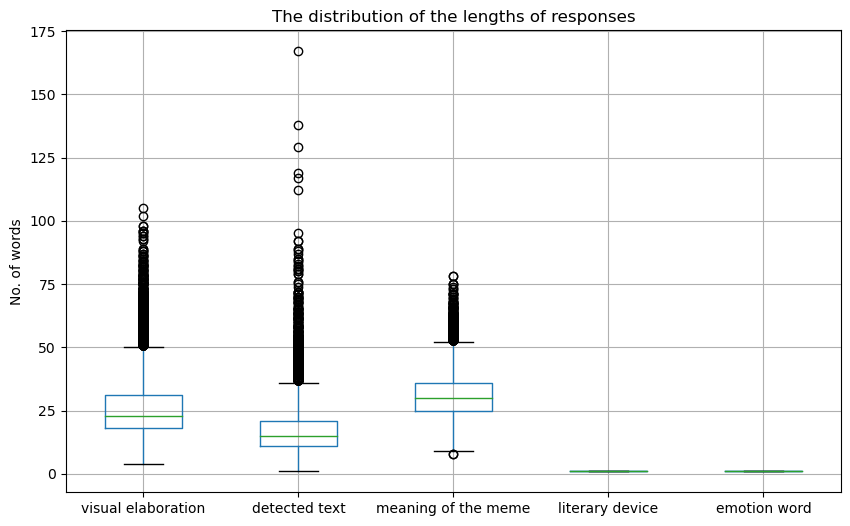

In [17]:
str_length_statistics(filtered_meme_configs_5_attributes)

# Label distribution

In [18]:
literary_device_label_dict = defaultdict(lambda: 0)
emotion_label_dict= defaultdict(lambda: 0)

for idx, meme_conf in enumerate(filtered_meme_configs_5_attributes):
    literary_device_label_dict[meme_conf['literary device']] += 1
    emotion_label_dict[meme_conf['emotion word']] += 1
pp.pprint(literary_device_label_dict)
pp.pprint(emotion_label_dict)

defaultdict(<function <lambda> at 0x7f1a86020b80>,
            {   'allegory': 37,
                'alliteration': 17,
                'allusion': 813,
                'amplification': 13,
                'anagram': 7,
                'analogy': 342,
                'anthropomorphism': 10,
                'antithesis': 893,
                'chiasmus': 186,
                'circumlocution': 3,
                'euphemism': 545,
                'hyperbole': 8873,
                'imagery': 4,
                'metaphor': 125,
                'none': 734,
                'oxymoron': 102,
                'paradox': 3131,
                'personification': 42,
                'portmanteau': 12,
                'pun': 3060,
                'sarcasm': 5307,
                'satire': 3296,
                'simile': 73,
                'symbolism': 6})
defaultdict(<function <lambda> at 0x7f1a86020900>,
            {   'anger': 1787,
                'contempt': 6842,
                'disgust': 275

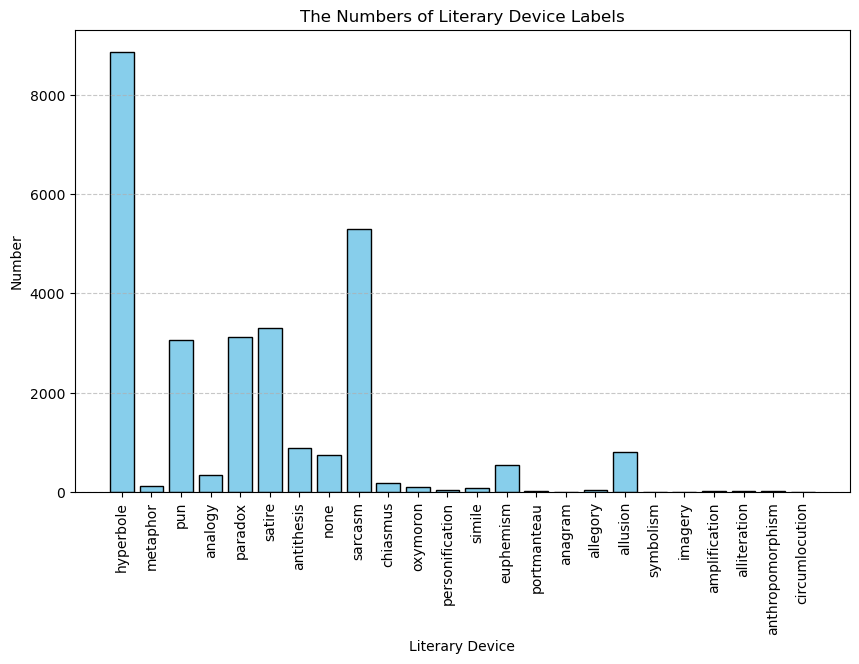

In [19]:
import matplotlib.pyplot as plt

# Extract the keys and values from the dictionary
keys = list(literary_device_label_dict.keys())
values = list(literary_device_label_dict.values())

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)

plt.title('The Numbers of Literary Device Labels')
plt.xlabel('Literary Device')
plt.ylabel('Number')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


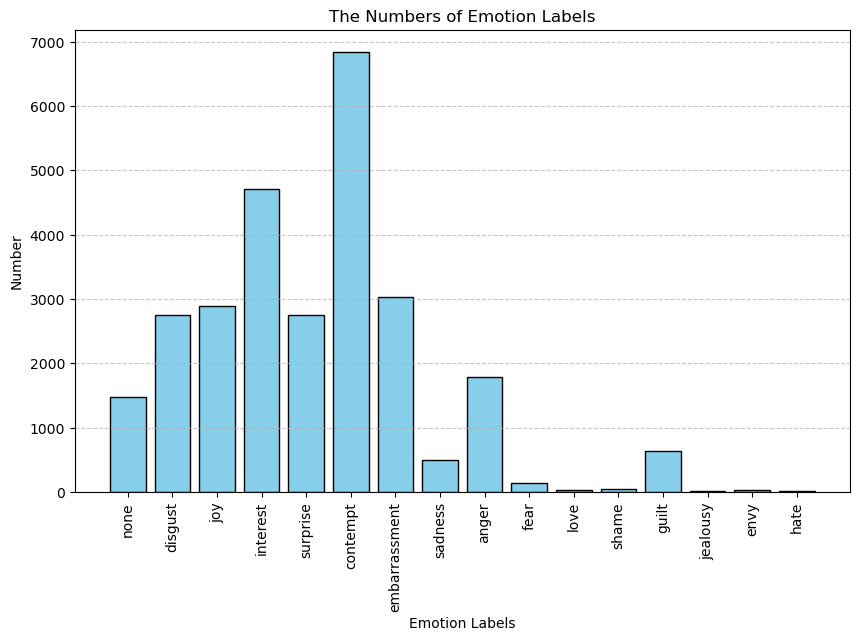

In [20]:
import matplotlib.pyplot as plt

# Extract the keys and values from the dictionary
keys = list(emotion_label_dict.keys())
values = list(emotion_label_dict.values())

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)

plt.title('The Numbers of Emotion Labels')
plt.xlabel('Emotion Labels')
plt.ylabel('Number')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()
